In [1]:
import numpy as np
import torch 
from d2l import torch as d2l
import math
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
%matplotlib inline

In [5]:
eta = 0.4
def f_2d(x1, x2):
    return 0.1*x1**2 + 2*x2**2
def gd_2d(x1, x2, s1, s2):
    return (x1 - 0.2*eta*x1, x2 - 4*eta*x2, 0, 0)

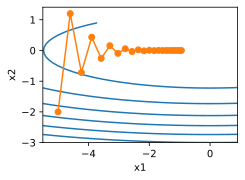

In [6]:
d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d))

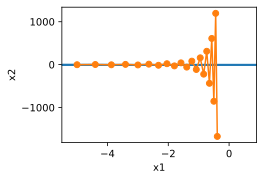

In [7]:
eta = 0.6
d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d))

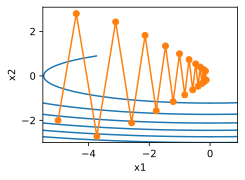

In [16]:
def momentum(x1, x2, v1, v2):
    v1 = beta*v1 + 0.2*x1
    v2 = beta*v2 + 4*x2
    return (x1 - eta*v1, x2 - eta*v2, v1, v2)
eta, beta = 0.6, 0.25
d2l.show_trace_2d(f_2d, d2l.train_2d(momentum))

In [22]:
def init_momentum_states(feature_dim):
    v_w = torch.zeros((feature_dim, 1))
    v_b = torch.zeros(1)
    
    return v_w, v_b
    
def sgd_momentum(params, states, hyperparams):
    for p, v in zip(params, states):
        with torch.no_grad():
            v[:] = hyperparams['momentum'] * v + p.grad
            p[:] -= hyperparams['lr'] * v
        p.grad.data.zero_()

loss: 0.245, 0.017 sec/epoch


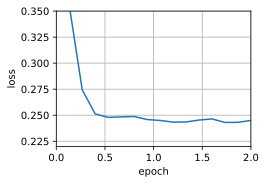

In [23]:
def train_momentum(lr, momentum, num_epochs=2):
    d2l.train_ch11(sgd_momentum, init_momentum_states(feature_dim), {
        'lr': lr,
        'momentum': momentum}, data_iter, feature_dim, num_epochs)

data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
train_momentum(0.02, 0.5)